# Living Things

Replicate the Rogers and McClelland network that learns categories of living things.

First import stuff, load the training set, and define the sigmoid function.

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

living_things = pd.read_excel('livingthings1.xls')
living_things

,Interpretation,Ponderosa,White-Pine,Live-Oak,Black-Oak,French-Rose,Musk-Rose,Common-Daisy,Sunflower,Blackbird,Redwing,Brimstone-Canary,Mosaic-Canary,Striped-Bass,Spotted-Bas,Chinook-Salmon,Sockyeye-Salmon
0,Living,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Plant,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
2,Animal,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
3,Tree,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Flower,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
5,Bird,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0
6,Pine,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Hardwood,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Softwood,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Oak,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
living_things.set_index('Interpretation',inplace=True)
living_things.head()

,Ponderosa,White-Pine,Live-Oak,Black-Oak,French-Rose,Musk-Rose,Common-Daisy,Sunflower,Blackbird,Redwing,Brimstone-Canary,Mosaic-Canary,Striped-Bass,Spotted-Bas,Chinook-Salmon,Sockyeye-Salmon
Interpretation,,,,,,,,,,,,,,,,
Living,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Plant,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
Animal,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
Tree,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
Flower,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0


Initialize inputs and outputs. Each row is an input or output vector.

In [40]:
"""
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
"""

num_living_things = 16
X = np.identity(num_living_things)
print(X.shape, X, sep='\n')

(16, 16)
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [46]:
"""
y = np.array([[0],
              [1],
              [1],
              [0]])
"""

Y = living_things.values.T
print(Y.shape, Y, sep='\n')

(16, 42)
[[1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
  0 0 0 1 0]
 [1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
  0 0 0 1 0]
 [1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0
  0 0 0 1 0]
 [1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1
  1 0 0 0 1]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1
  1 0 0 0 1]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1
  1 0 0 0 1]
 [1 0 1 0 0 

Initialize the network architecture.

In [47]:
numb_input_units = len(X)
numb_hidden_units = 10 # this is just based on what Whit had done previously
numb_output_units = Y.shape[1]

print(numb_input_units, numb_hidden_units, numb_output_units)

16 10 42


Randomly initialize our weights with mean 0.

In [63]:
np.random.seed(1)
syn0 = 2*np.random.random((numb_input_units ,numb_hidden_units)) - 1
syn1 = 2*np.random.random((numb_hidden_units,numb_output_units)) - 1

print(syn0.shape, syn1.shape)

(16, 10) (10, 42)


Train the network. Each `j` is an epoch; this program updates the weights after each full presentation of the training data. That's why the program feeds the entire training set through simultaneously.

In [64]:
ecrit = 1
maxepochs = 5000

In [76]:
for j in range(maxepochs):

    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = sigmoid(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = Y - l2
    
    # in what direction is the target value?
    # were we really sure? that is, was the activation level of l2 very high or very low? if so, don't change too much (exactly how much determined by the derivative of the sigmoid fxn).
    l2_delta = l2_error*sigmoid(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure (again, in terms of activation level of l1)? if so, don't change too much.
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

    if (j% 10000) == 0:
        print("\nEpoch: "    + str(j))
        #print("l0 input:\n" + str(l0))
        #print("l1 activation:\n" + str(l1))
        #print("l2 activation:\n" + str(l2))
        #print("Weights from input to hidden:\n" + str(syn0))
        #print("Weights from hidden to output:\n" + str(syn1))
        #print("l2_error:\n" + str(l2_error))
        #print("l2_delta:\n" + str(l2_delta))
        #print("l1_error:\n" + str(l1_error))
        #print("l1_delta:\n" + str(l1_error))
    
    if sum(sum(abs(l2_error))) < ecrit:
        break

print("Last epoch number:", j)
print("Total erorr at end of training:",sum(sum(abs(l2_error))))
print("Error by living thing:\n",abs(l2_error).sum(axis=1))


Epoch: 0
Last epoch number: 4999
Total erorr at end of training: 1.05348473573
Error by living thing:
 [ 0.07171767  0.07960764  0.05306605  0.0997329   0.07303774  0.08157345
  0.04842007  0.05221764  0.05720593  0.06216274  0.05838804  0.0659357
  0.05304358  0.0633815   0.06341732  0.07057677]


In [78]:
living_things_trained = pd.DataFrame(data=l1, index=living_things.columns)
living_things_trained

,0,1,2,3,4,5,6,7,8,9
Ponderosa,0.982192,0.990784,0.021434,0.980564,0.013115,0.308726,0.166185,0.207862,0.010414,0.041477
White-Pine,0.439456,0.982736,0.009308,0.984112,0.131441,0.984303,0.012360,0.016601,0.204958,0.972987
Live-Oak,0.972065,0.967926,0.025796,0.891197,0.975085,0.032295,0.032158,0.027246,0.055589,0.985072
Black-Oak,0.980378,0.992340,0.564543,0.024378,0.991683,0.015515,0.442496,0.007505,0.011926,0.331267
French-Rose,0.141914,0.398822,0.263758,0.977365,0.369109,0.021075,0.991811,0.017178,0.977833,0.020852
Musk-Rose,0.020476,0.168220,0.376453,0.985272,0.022327,0.667905,0.988703,0.015887,0.975711,0.968908
Common-Daisy,0.979574,0.022669,0.975664,0.742335,0.301812,0.042407,0.906487,0.067482,0.906335,0.973056
Sunflower,0.975845,0.072131,0.957188,0.634872,0.058740,0.034218,0.985960,0.045323,0.042893,0.914789
Blackbird,0.076913,0.902475,0.987717,0.061452,0.969641,0.960495,0.169998,0.966019,0.046644,0.048995
Redwing,0.014784,0.973158,0.978984,0.247469,0.107370,0.980523,0.155286,0.980232,0.643186,0.070686


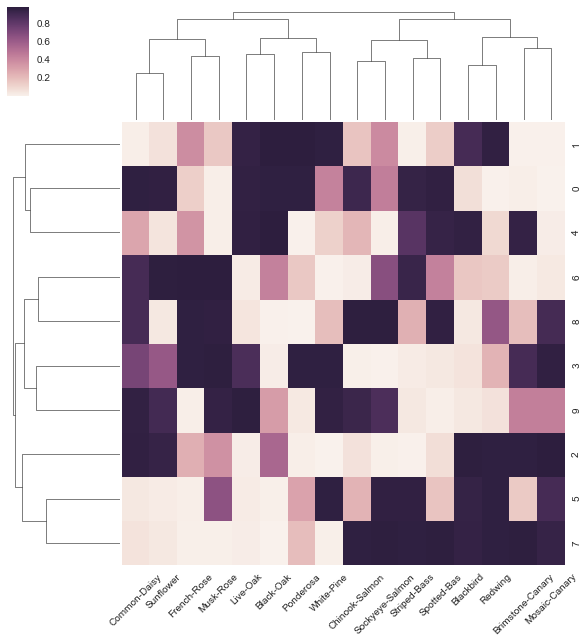

In [89]:
g = sns.clustermap(living_things_trained.T);
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45);

As expected, similar categories, like two different kinds of canary, have similar hidden unit representations.